In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import models, layers

In [3]:
Image_Size=256
Batch_Size=32

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PatatoLeafDataSet",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_Size
)

Found 2153 files belonging to 3 classes.


In [5]:
className=dataset.class_names
className

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

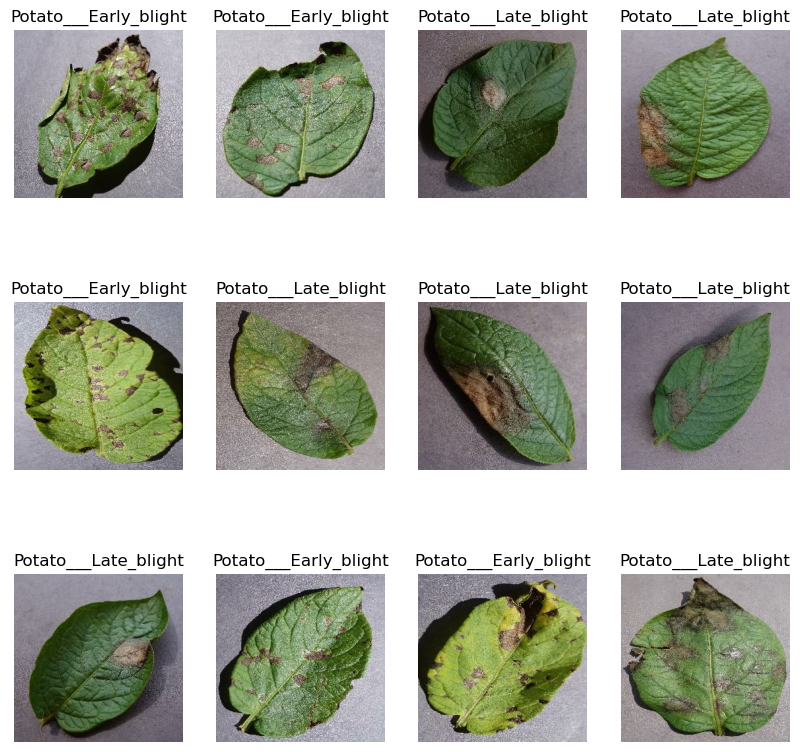

In [6]:
plt.figure(figsize=(10,10))
for batch_Image,batch_lable in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(className[batch_lable[i]])
        plt.imshow(batch_Image[i].numpy().astype("uint8"))
        plt.axis("off")

In [7]:
# calculate Training 80% , Testing 10%  , Validation 10%

In [8]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds=dataset.take(54)
len(train_ds)

54

In [10]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [11]:
valide_size=0.1
len(dataset)*valide_size


6.800000000000001

In [12]:
valide_ds=dataset.take(6)
len(valide_ds)

6

In [13]:
test_ds=test_ds.skip(6)

In [14]:
len(test_ds)

8

In [15]:
def dataset_preprocessing(ds,train_split=0.8, valide_splite=0.1,test_splite=0.1, shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
        
    train_size=int(train_split*ds_size)
    # print(train_size)
    valide_size=int(valide_splite*ds_size)
    # print(valide_size)
    train_ds=ds.take(train_size)
    valide_ds=ds.skip(train_size).take(valide_size)
    test_ds=ds.skip(train_size).skip(valide_size)
    return train_ds,valide_ds,test_ds

In [16]:
train_ds,valide_ds,test_ds=dataset_preprocessing(dataset)

In [17]:
print(len(train_ds))
print(len(valide_ds))
len(test_ds)

54
6


8

In [18]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valide_ds=valide_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(Image_Size,Image_Size),
    layers.Rescaling(1.0/255)
])

In [20]:
data_agumentation=tf.keras.Sequential([
    layers.RandomFlip("Horizontal_and_Vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1)
])

In [21]:
model = models.Sequential([
    layers.Input(shape=(Image_Size, Image_Size, 3)),

    resize_and_rescale,
    data_agumentation,

    layers.Conv2D(32, (3,3), activation="relu"),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax"),
])


In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,752,227 (14.31 MB)

 Trainable params: 3,752,227 (14.31 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [29]:
Batch_Size


32

In [30]:
model.fit(
    train_ds,
    batch_size=Batch_Size,
    validation_data=valide_ds,
    verbose=1,
    epochs=10
)

Epoch 1/10


C:\Users\Rashid Ali\AppData\Roaming\Python\Python313\site-packages\keras\src\backend\tensorflow\nn.py:1214: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 ━━━━━━━━━━━━━━━━━━━━ 949s 17s/step - accuracy: 0.7541 - loss: 0.6028 - val_accuracy: 0.8073 - val_loss: 0.4554
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 966s 18s/step - accuracy: 0.8906 - loss: 0.2946 - val_accuracy: 0.9115 - val_loss: 0.2291
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1120s 21s/step - accuracy: 0.9039 - loss: 0.2411 - val_accuracy: 0.9062 - val_loss: 0.2164
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1657s 30s/step - accuracy: 0.9485 - loss: 0.1548 - val_accuracy: 0.9062 - val_loss: 0.2575
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1395s 26s/step - accuracy: 0.9282 - loss: 0.1840 - val_accuracy: 0.9531 - val_loss: 0.1546
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1024s 19s/step - accuracy: 0.9508 - loss: 0.1423 - val_accuracy: 0.9583 - val_loss: 0.1308
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 887s 16s/step - accuracy: 0.9410 - loss: 0.1432 - val_accuracy: 0.8906 - val_loss: 0.2758
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 865s 16s/step - accuracy: 0.9647 - loss: 0.1014 - val_accuracy: 0.9635 - 

In [35]:
score=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.9453 - loss: 0.1698


Label Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
ImagePredict : Potato___Early_blight


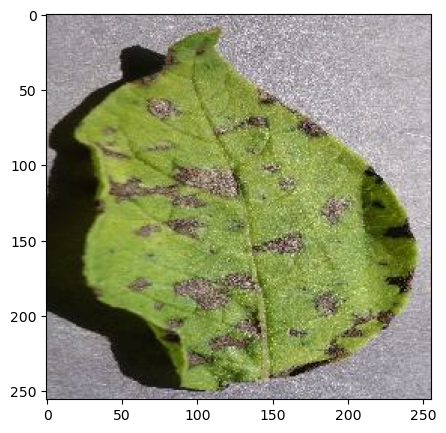

In [114]:
import numpy as np
plt.figure(figsize=(5,5))
for image_batch,image_lable in test_ds.take(1):
    image=image_batch[0].numpy().astype("uint8")
    print("Label",className[image_lable[0].numpy()])
    plt.imshow(image)
    batch_pridicit=model.predict(image_batch)
    print("ImagePredict :",className[np.argmax(batch_pridicit[0])])

In [117]:
def predicted(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img)
    img_array=tf.expand_dims(img_array,0)

    prediction=model.predict(img_array)

    prediction_class=className[np.argmax(prediction[0])]
    confidence=round(100*(np.max(prediction[0])),2)

    return prediction_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


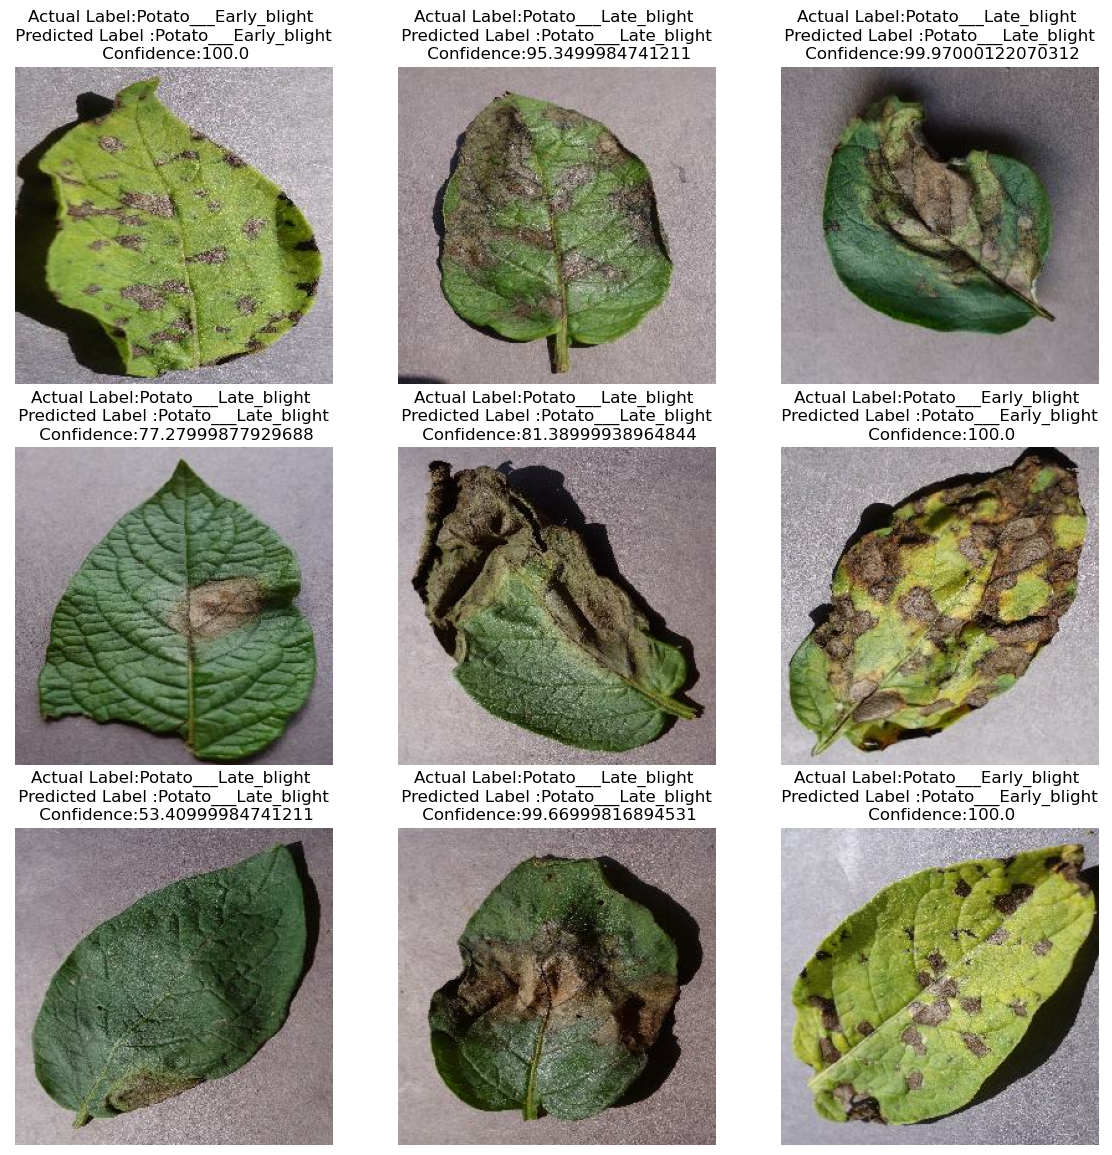

In [119]:
plt.figure(figsize=(14,14))
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        prediction,confidence=predicted(model,images[i].numpy())
        actual_label=className[labels[i]]
        plt.title(f"Actual Label:{actual_label} \n Predicted Label :{prediction} \n Confidence:{confidence}")
        plt.axis("off")

In [87]:
model_version=2
model.save(f"Models/model_v{model_version}.h5")

